In [142]:
# Andy McDonald - K-Means Clustering Algorithm with Python Tutorial
# https://www.youtube.com/watch?v=iNlZ3IU5Ffw

import pandas as pd                                     # pip install -U pandas
import matplotlib.pyplot as plt                         # pip install -U matplotlib
import numpy as np

from sklearn.preprocessing import StandardScaler        # pip install -U scikit-learn
from sklearn.cluster import KMeans


df = pd.read_csv("sc02_act1_3.csv", index_col = "i")

In [143]:
df
# df.dropna(inplace=True)
df.drop(["Quadrant"], axis=1)

,X2 (x),X1 (y),Color,Color_int
i,,,,
1,5,5,Blue,2
2,-4,4,Red,1
3,-2,4,Blue,2
4,2,4,Blue,2
5,-3,3,Blue,2
6,3,3,Blue,2
7,-4,2,Blue,2
8,2,2,Red,1
9,4,2,Blue,2


In [144]:
df.describe()

,X2 (x),X1 (y),Color_int,Quadrant
count,16.000000,16.000000,16.000000,16.000000
mean,-0.750000,0.625000,1.812500,2.125000
std,3.193744,3.344149,0.403113,0.957427
min,-4.000000,-4.000000,1.000000,1.000000
25%,-3.250000,-3.000000,2.000000,1.000000
50%,-2.000000,2.000000,2.000000,2.000000
75%,2.000000,3.250000,2.000000,3.000000
max,5.000000,5.000000,2.000000,4.000000


In [145]:
scaler = StandardScaler()
df[["X2_T", "X1_T"]] = scaler.fit_transform(df[["X2 (x)", "X1 (y)"]])
df2 = df.copy()
df

,X2 (x),X1 (y),Color,Color_int,Quadrant,X2_T,X1_T
i,,,,,,,
1,5,5,Blue,2,1,1.859440,1.351160
2,-4,4,Red,1,2,-1.050988,1.042323
3,-2,4,Blue,2,2,-0.404226,1.042323
4,2,4,Blue,2,1,0.889297,1.042323
5,-3,3,Blue,2,2,-0.727607,0.733487
6,3,3,Blue,2,1,1.212678,0.733487
7,-4,2,Blue,2,2,-1.050988,0.424650
8,2,2,Red,1,1,0.889297,0.424650
9,4,2,Blue,2,1,1.536059,0.424650


In [146]:
def optimize_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, n_init="auto")        # I placed the n_init to suppress the warning (default was previously 10)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # Generate the elbow plot
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, "o-")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

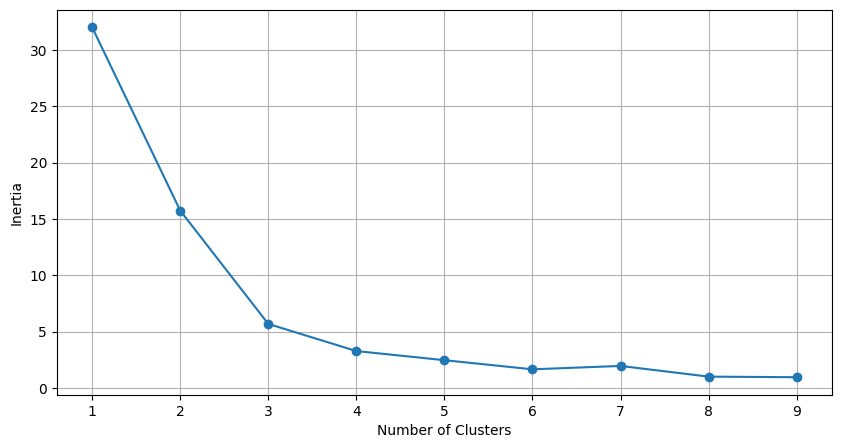

In [147]:
optimize_k_means(df[["X2_T", "X1_T"]], 10)

# Applying K Means Clustering

In [148]:
kmeans = KMeans(n_clusters=3, n_init="auto")       # the 3 here is the number of clusters as required
kmeans.fit(df[["X2_T", "X1_T"]])

KMeans(n_clusters=3, n_init='auto')

In [149]:
df["kmeans_3"] = kmeans.labels_
df

,X2 (x),X1 (y),Color,Color_int,Quadrant,X2_T,X1_T,kmeans_3
i,,,,,,,,
1,5,5,Blue,2,1,1.859440,1.351160,2
2,-4,4,Red,1,2,-1.050988,1.042323,1
3,-2,4,Blue,2,2,-0.404226,1.042323,1
4,2,4,Blue,2,1,0.889297,1.042323,2
5,-3,3,Blue,2,2,-0.727607,0.733487,1
6,3,3,Blue,2,1,1.212678,0.733487,2
7,-4,2,Blue,2,2,-1.050988,0.424650,1
8,2,2,Red,1,1,0.889297,0.424650,2
9,4,2,Blue,2,1,1.536059,0.424650,2


# Plotting the Results

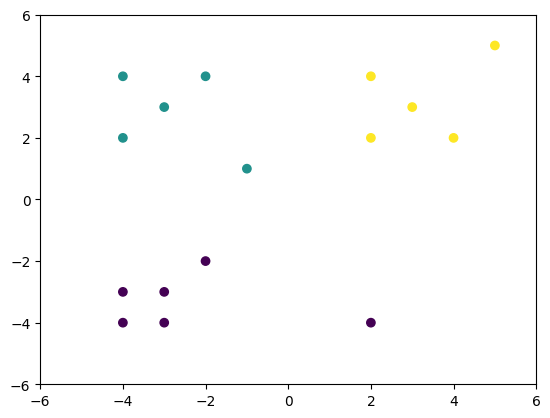

In [150]:
plt.scatter(x=df["X2 (x)"], y=df["X1 (y)"], c=df["kmeans_3"])
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()

# Creating Multiple Clusters

In [151]:
for k in range(1, 6):
    kmeans=KMeans(n_clusters=k, n_init="auto")
    kmeans.fit(df[["X2_T", "X1_T"]])
    df[f'KMeans_{k}'] = kmeans.labels_

In [152]:
df

,X2 (x),X1 (y),Color,Color_int,Quadrant,X2_T,X1_T,kmeans_3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
i,,,,,,,,,,,,,
1,5,5,Blue,2,1,1.859440,1.351160,2,0,1,1,1,4
2,-4,4,Red,1,2,-1.050988,1.042323,1,0,0,2,2,2
3,-2,4,Blue,2,2,-0.404226,1.042323,1,0,0,2,2,2
4,2,4,Blue,2,1,0.889297,1.042323,2,0,1,1,1,1
5,-3,3,Blue,2,2,-0.727607,0.733487,1,0,0,2,2,2
6,3,3,Blue,2,1,1.212678,0.733487,2,0,1,1,1,1
7,-4,2,Blue,2,2,-1.050988,0.424650,1,0,0,2,2,2
8,2,2,Red,1,1,0.889297,0.424650,2,0,1,1,1,1
9,4,2,Blue,2,1,1.536059,0.424650,2,0,1,1,1,4


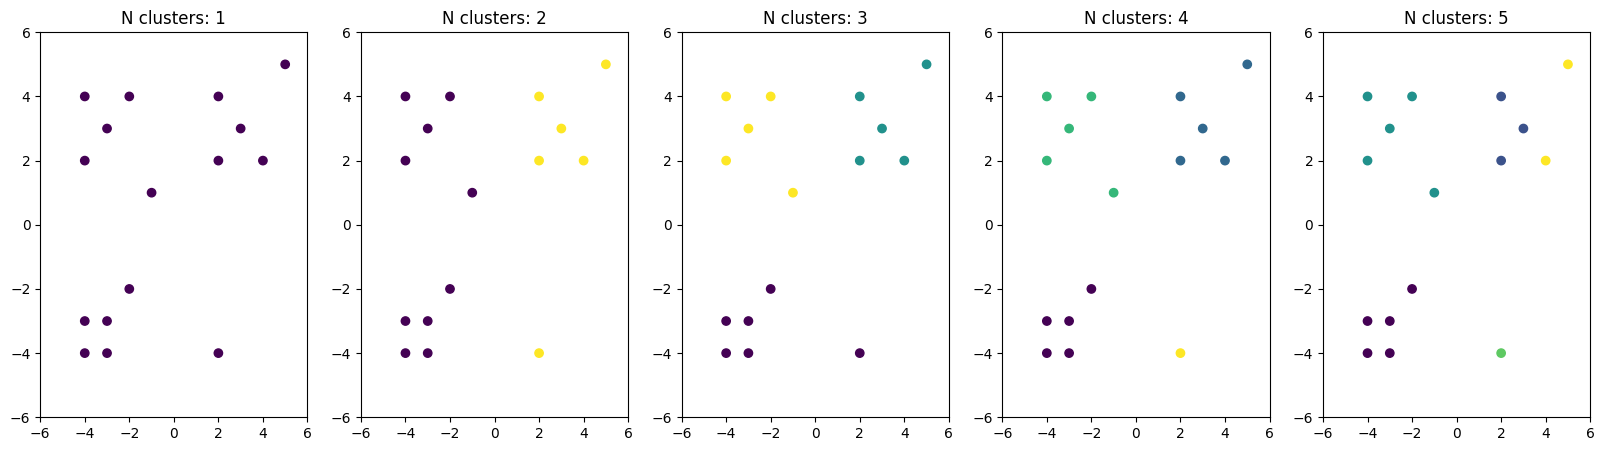

In [153]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df["X2 (x)"], y=df["X1 (y)"], c=df[f'KMeans_{i}'])
    ax.set_ylim(-6, 6)
    ax.set_xlim(-6, 6)
    ax.set_title(f'N clusters: {i}')

# Activity Solution

In [154]:
# centroids = np.array
centroids = df2[df2["Color_int"] == 1]
# centroids.drop(["Quadrant"], axis=1)
centroids = centroids[["X2 (x)", "X1 (y)"]]
centroids[["X2_T", "X1_T"]] = scaler.fit_transform(centroids[["X2 (x)", "X1 (y)"]])

kolokoy = KMeans(n_clusters=3, init=centroids, n_init=1)
# kolokoy = KMeans(n_clusters=3, init=centroids, n_init="auto")
kolokoy.fit(df2[["X2 (x)", "X1 (y)"]])

ValueError: The shape of the initial centers (3, 4) does not match the number of features of the data 2.

In [155]:
# df2["kmeans_3"] = kolokoy.labels_
df2

,X2 (x),X1 (y),Color,Color_int,Quadrant,X2_T,X1_T
i,,,,,,,
1,5,5,Blue,2,1,1.859440,1.351160
2,-4,4,Red,1,2,-1.050988,1.042323
3,-2,4,Blue,2,2,-0.404226,1.042323
4,2,4,Blue,2,1,0.889297,1.042323
5,-3,3,Blue,2,2,-0.727607,0.733487
6,3,3,Blue,2,1,1.212678,0.733487
7,-4,2,Blue,2,2,-1.050988,0.424650
8,2,2,Red,1,1,0.889297,0.424650
9,4,2,Blue,2,1,1.536059,0.424650


In [156]:
centroids

,X2 (x),X1 (y),X2_T,X1_T
i,,,,
2,-4,4,-0.707107,0.980581
8,2,2,1.414214,0.392232
14,-4,-4,-0.707107,-1.372813
